In [1]:
%matplotlib inline
!pip install contextily
!pip install geopandas
import pandas as pd
import geopandas
import contextily as ctx
from shapely.geometry import Point
import xyzservices.providers as xyz
from google.colab import drive

     |████████████████████████████████| 19.3 MB 1.4 MB/s 
     |████████████████████████████████| 1.0 MB 4.3 MB/s 
     |████████████████████████████████| 6.3 MB 54.3 MB/s 
     |████████████████████████████████| 15.4 MB 52 kB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
corsi=geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Corsi_acqua_Piano_di_Gestione.zip')
com=geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Limiti01012021_g/Com01012021_g')
pro=geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Limiti01012021_g/ProvCM01012021_g')
reg=geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Limiti01012021_g/Reg01012021_g')
com

COD_RIP  ...                                           geometry
0           1  ...  POLYGON ((404703.558 5026682.655, 405359.554 5...
1           1  ...  POLYGON ((380700.909 4977305.520, 381105.998 4...
2           1  ...  POLYGON ((364710.857 5022090.678, 364737.794 5...
3           1  ...  POLYGON ((415942.504 5033304.609, 416079.315 5...
4           1  ...  POLYGON ((376934.962 4999073.854, 376960.555 4...
...       ...  ...                                                ...
7898        5  ...  MULTIPOLYGON (((556602.772 4375162.650, 556598...
7899        5  ...  POLYGON ((541186.146 4375105.653, 541180.146 4...
7900        5  ...  MULTIPOLYGON (((546451.098 4325900.553, 546443...
7901        5  ...  POLYGON ((500362.475 4361229.767, 500397.474 4...
7902        5  ...  POLYGON ((494131.525 4353208.832, 494847.519 4...

[7903 rows x 13 columns]

1. visualizzi su una mappa i 10 corsi d'acqua più lunghi della provincia di Milano

In [4]:
milano_pro= pro[pro['DEN_UTS']=='Milano']
milano_pro

COD_RIP  ...                                           geometry
14        1  ...  MULTIPOLYGON (((538136.289 5004372.814, 539162...

[1 rows x 13 columns]

In [5]:
corsi_len = corsi.sort_values('SHAPE_LEN', ascending=False).head(10)
corsi_len

OBJECTID  ...                                           geometry
18       124  ...  MULTILINESTRING ((478097.612 5045956.958, 4780...
36       593  ...  MULTILINESTRING ((541297.507 5041518.075, 5412...
10        84  ...  MULTILINESTRING ((541297.507 5041518.075, 5412...
0        188  ...  LINESTRING (480362.262 5040575.220, 480364.627...
7         65  ...  MULTILINESTRING ((483579.882 5034726.498, 4835...
31       501  ...  LINESTRING (541227.887 5050214.931, 541227.203...
26       357  ...  MULTILINESTRING ((495438.399 5047188.843, 4954...
8         66  ...  MULTILINESTRING ((477067.969 5044605.066, 4770...
15       112  ...  MULTILINESTRING ((516227.432 5021570.890, 5162...
1        191  ...  MULTILINESTRING ((494060.091 5029696.046, 4940...

[10 rows x 31 columns]

In [6]:
corsi_mi = corsi_len[corsi_len.intersects(milano_pro.unary_union)]
corsi_mi

OBJECTID  ...                                           geometry
18       124  ...  MULTILINESTRING ((478097.612 5045956.958, 4780...
36       593  ...  MULTILINESTRING ((541297.507 5041518.075, 5412...
10        84  ...  MULTILINESTRING ((541297.507 5041518.075, 5412...
0        188  ...  LINESTRING (480362.262 5040575.220, 480364.627...
7         65  ...  MULTILINESTRING ((483579.882 5034726.498, 4835...
31       501  ...  LINESTRING (541227.887 5050214.931, 541227.203...
26       357  ...  MULTILINESTRING ((495438.399 5047188.843, 4954...
8         66  ...  MULTILINESTRING ((477067.969 5044605.066, 4770...
15       112  ...  MULTILINESTRING ((516227.432 5021570.890, 5162...
1        191  ...  MULTILINESTRING ((494060.091 5029696.046, 4940...

[10 rows x 31 columns]

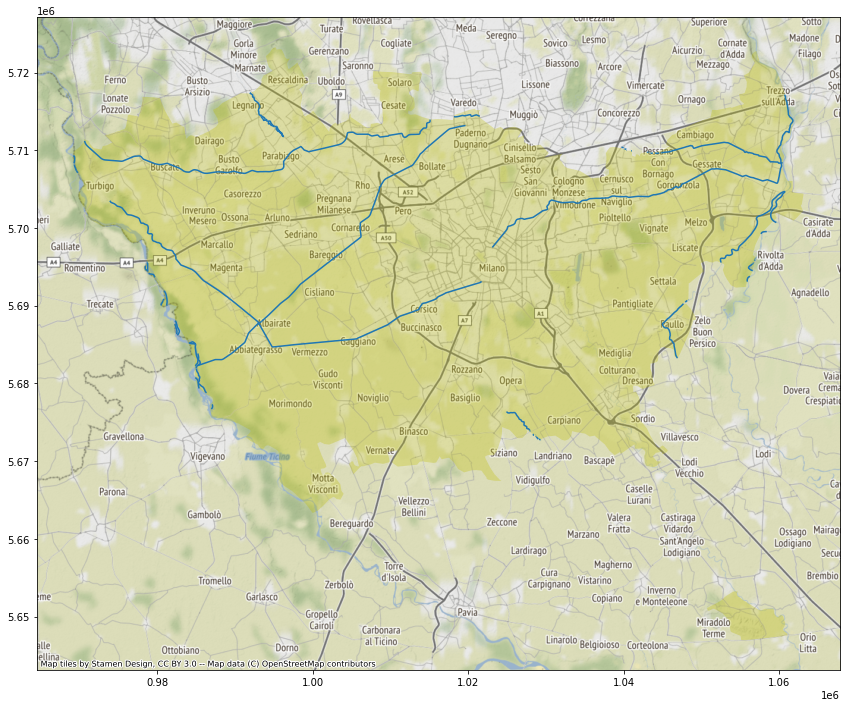

In [7]:
ax = corsi_mi.to_crs(epsg=3857).plot(figsize=(20,12))
milano_pro.to_crs(epsg=3857).plot(ax=ax,alpha=0.3, facecolor='y')
ctx.add_basemap(ax)

2. visualizzi su una mappa i Navigli e i fiumi da cui prendono l'acqua. Utilizzare colori diversi per rappresentare i navigli rispetto ai fiumi ed evidenziare bene i percorsi sulla mappa

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:234: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = LineCollection(segments, **kwargs)


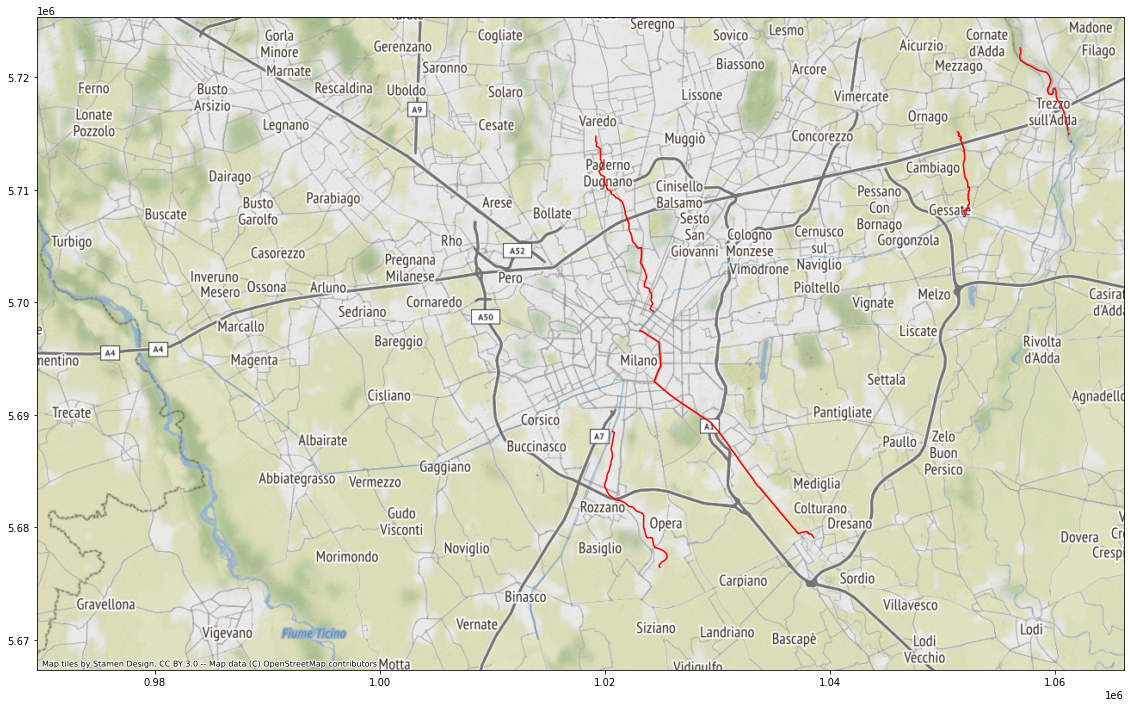

In [8]:
navigli=  corsi[corsi.NOME.str.contains('Navigli')]
corsi_nav= corsi[corsi.touches(navigli.unary_union)]
ax = corsi_nav.to_crs(epsg=3857).plot(figsize=(20,12),edgecolor='r')
navigli.to_crs(epsg=3857).plot(ax=ax,alpha=0.3, facecolor='')
ctx.add_basemap(ax)

3. visualizzi su una mappa i corsi d'acqua che passano in un comune inserito dall'utente

Bresso


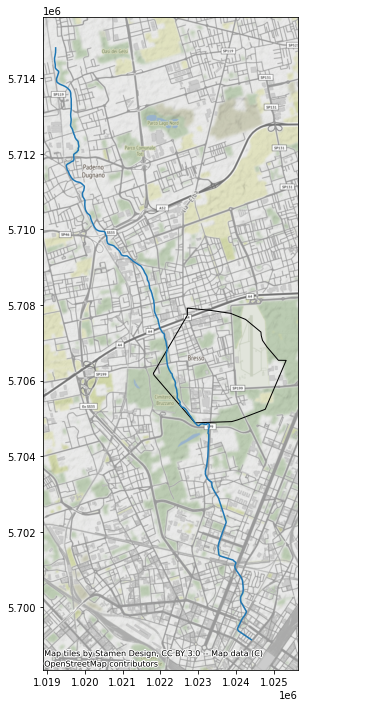

In [9]:
user = input()
lst= list(com['COMUNE'])
if user not in lst:
  print('no')
else:
  comu= com[com.COMUNE==user]
  corsi_com= corsi[corsi.intersects(comu.geometry.squeeze())]
  ax = corsi_com.to_crs(epsg=3857).plot(figsize=(20,12))
  comu.to_crs(epsg=3857).plot(ax=ax, facecolor='none', edgecolor='k')
  ctx.add_basemap(ax)

#visualizzare la parte di fiume contenuta nel comune

4. visualizzi su una mappa un fiume inserito dall'utente con tutti i comuni  che attraversa. Se attraversa Milano, visualizzare solo i quartieri che attraversa

Adda (Fiume)


/usr/local/lib/python3.7/dist-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


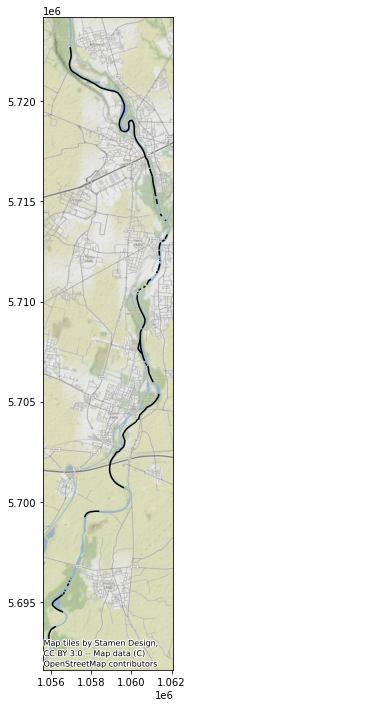

In [10]:
user = input()
lst= list(corsi['NOME'])
if user not in lst:
  print('no')
else:
  corsi_int= corsi[corsi.NOME==user]
  comune_corsi= com[com.intersects(corsi_int.geometry.squeeze())]
  ax = comune_corsi.to_crs(epsg=3857).plot(figsize=(20,12))
  corsi_int.to_crs(epsg=3857).plot(ax=ax, facecolor='none', edgecolor='k')
  ctx.add_basemap(ax)


4. visualizzi su una mappa un fiume inserito dall'utente con tutti i comuni  che attraversa. Se attraversa Milano, visualizzare solo i quartieri che attraversa

5. visualizzi il numero di corsi d'acqua della provincia di Milano e la lunghezza totale di tutti i corsi d'acqua

In [11]:
Acque_Milano = corsi[corsi.intersects(milano_pro.unary_union)]
print("Tot corsi d'acqua:" , Acque_Milano["NOME"].count())
print("Tot lunghezza dei corsi d'acqua:" , Acque_Milano["SHAPE_LEN"].sum() , "km")


Tot corsi d'acqua: 45
Tot lunghezza dei corsi d'acqua: 1083787.6793008223 km


6. visualizzi su una mappa i comuni della provincia di Milano che non sono attraversati da corsi d'acqua

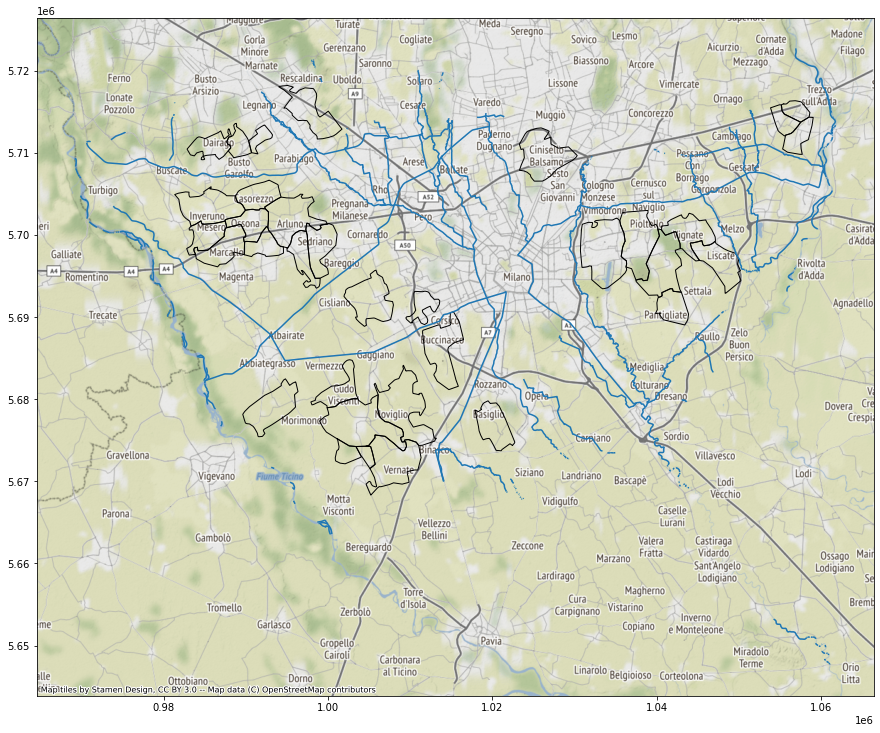

In [12]:
comuni_Milano = com[com.within(milano_pro.unary_union)]
comuni_Milano
#   trovo i comuni attraversati dal fiume
Comuni_PROV_MILANO_Attraversati_Dal_Fiume = comuni_Milano[comuni_Milano.intersects(Acque_Milano.unary_union)]
Comuni_PROV_MILANO_Attraversati_Dal_Fiume

#   trovo i comuni non attraversati dal fiume facendo una copia dei comuni di milano e sotraendo quelli attraversati
copia_comuni_Milano = comuni_Milano

#   eliminare dal df dei comuni di milano quelli attraversati dal fiume facendo il df qi quelliattraversati .index
comuni_non_Attraversati = copia_comuni_Milano.drop(Comuni_PROV_MILANO_Attraversati_Dal_Fiume.index)
comuni_non_Attraversati
ax = comuni_non_Attraversati.to_crs(epsg=3857).plot(figsize = (15,15), facecolor = "none", Edgecolor = "k")
Acque_Milano.to_crs(epsg=3857).plot(ax=ax)
ctx.add_basemap(ax)